# Binary classification in Python

## Case: "Default prediction"
#Lets do it.



### Step 0: To start ...

In [ ]:
# Turn on multi-threading on your computer for faster calculation
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# Steps 1 and 2: Install and load the necessary packages and libraries

In [ ]:
# Step 1: Check conda environment and installed packages and libaries
# import sys
# !conda env list
# !conda list
# !conda update --all

# Download and install pandas, numpy, scikit-learn. Note, this might need to be done in Anaconda prompt
# !conda install pandas # pandas includes numpy
# !conda install scikit-learn

# Step 2: Load the necessary packages and libaries

import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

# Step 3: Load the data

In [ ]:
# Step 3: Load the data from the CSV file into the dataframe that we called df.

# df = pd.read_csv(path, header = 0) #, encoding = "ISO-8859-1")

# For Google Colab:
from google.colab import files
uploaded = files.upload()
import io
df1 = pd.read_csv(io.BytesIO(uploaded['6722-credit-card-default-data.csv']), header = 0, sep = ",")

df1.head() # show the "head" -- first 5 rows of the data; note, these are rows 0...4

Saving 6722-credit-card-default-data.csv to 6722-credit-card-default-data.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
df, df_f = train_test_split(df1, test_size=0.0416)
df_f.shape

(999, 25)

# Step 4: "Cleaning" the data + Feature engineering

1. Some datafields (variables, features, columns) have incorect types -- they should be converted, for instance, from numbers to categoricals
    
2. Some data has zeros in categories we would assume 0 - missing data
3. Add new features

To conclude data cleaning we will, of course, have to create dummy variables ("one hot encoding") for the categorical variables


In [ ]:
df['Utilization_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['Utilization_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['Utilization_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['Utilization_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['Utilization_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['Utilization_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

In [ ]:
#df['Bill_payoff_1'] = np.where(df['BILL_AMT1'] > 0, df['PAY_AMT1']/df['BILL_AMT1'], np.where(df['BILL_AMT1'] < 0, 1+abs(df['PAY_AMT1']/df['BILL_AMT1']), 1))
df['Bill_payoff_1'] = np.where(df['BILL_AMT1'] > 0, df['PAY_AMT1']/df['BILL_AMT1'], np.where(df['BILL_AMT1'] < 0, 1+abs(df['PAY_AMT1']/df['BILL_AMT1']),np.where(df['BILL_AMT1'] < df['PAY_AMT1'], 1.5, 1)))
df['Bill_payoff_2'] = np.where(df['BILL_AMT2'] > 0, df['PAY_AMT2']/df['BILL_AMT2'], np.where(df['BILL_AMT2'] < 0, 1+abs(df['PAY_AMT2']/df['BILL_AMT2']),np.where(df['BILL_AMT2'] < df['PAY_AMT2'], 1.5, 1)))
df['Bill_payoff_3'] = np.where(df['BILL_AMT3'] > 0, df['PAY_AMT3']/df['BILL_AMT3'], np.where(df['BILL_AMT3'] < 0, 1+abs(df['PAY_AMT3']/df['BILL_AMT3']),np.where(df['BILL_AMT3'] < df['PAY_AMT3'], 1.5, 1)))
df['Bill_payoff_4'] = np.where(df['BILL_AMT4'] > 0, df['PAY_AMT4']/df['BILL_AMT4'], np.where(df['BILL_AMT4'] < 0, 1+abs(df['PAY_AMT4']/df['BILL_AMT4']),np.where(df['BILL_AMT4'] < df['PAY_AMT4'], 1.5, 1)))
df['Bill_payoff_5'] = np.where(df['BILL_AMT5'] > 0, df['PAY_AMT5']/df['BILL_AMT5'], np.where(df['BILL_AMT5'] < 0, 1+abs(df['PAY_AMT5']/df['BILL_AMT5']),np.where(df['BILL_AMT5'] < df['PAY_AMT5'], 1.5, 1)))
df['Bill_payoff_6'] = np.where(df['BILL_AMT6'] > 0, df['PAY_AMT6']/df['BILL_AMT6'], np.where(df['BILL_AMT6'] < 0, 1+abs(df['PAY_AMT6']/df['BILL_AMT6']),np.where(df['BILL_AMT6'] < df['PAY_AMT6'], 1.5, 1)))


In [ ]:
df['Bill_Amt_5_%diff'] = (df['BILL_AMT1']-df['BILL_AMT6'])/df['LIMIT_BAL']

In [ ]:
df['Pay_1_to_2'] = df['PAY_1']-df['PAY_2']
df['Pay_2_to_3'] = df['PAY_2']-df['PAY_3']
df['Pay_3_to_4'] = df['PAY_3']-df['PAY_4']
df['Pay_4_to_5'] = df['PAY_4']-df['PAY_5']
df['Pay_5_to_6'] = df['PAY_5']-df['PAY_6']

In [ ]:
df.head(9)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Bill_payoff_3,Bill_payoff_4,Bill_payoff_5,Bill_payoff_6,Bill_Amt_5_%diff,Pay_1_to_2,Pay_2_to_3,Pay_3_to_4,Pay_4_to_5,Pay_5_to_6
11619,11620,140000.0,2,2,1,35,1,2,0,0,...,0.085860,0.000000,0.074258,0.000000,-0.085600,-1,2,0,-2,0
16933,16934,70000.0,1,1,1,44,1,2,2,2,...,0.000000,0.087093,0.224820,0.000000,0.069800,-1,0,0,2,0
1740,1741,230000.0,2,2,1,62,0,0,0,0,...,0.032525,0.035251,0.036483,0.033403,-0.052130,0,0,0,0,0
22465,22466,50000.0,2,1,1,31,1,2,2,0,...,0.045916,0.021855,0.047154,0.039675,0.412740,-1,0,2,0,0
13060,13061,160000.0,2,1,2,29,-1,-1,2,-1,...,1.422427,0.000000,4.812500,0.000000,-0.015163,0,-3,3,-1,1
3932,3933,340000.0,2,2,1,46,-2,-2,-2,-2,...,1.000000,1.000000,1.000000,1.000000,0.000000,0,0,0,0,0
12462,12463,180000.0,2,2,1,40,0,0,0,0,...,0.000000,1.000000,1.000000,1.000000,0.125367,0,0,0,2,0
10065,10066,10000.0,1,2,2,25,-1,2,0,0,...,0.020452,0.040928,25.773196,0.000000,-0.221400,-3,2,0,1,0
10474,10475,60000.0,2,2,1,35,1,2,2,2,...,0.000000,0.230238,0.000000,0.000000,-0.031433,-1,0,0,0,-1


In [ ]:
# "Cleaning" the data -- part 1: converting incorrect data types

df.info() # Checking what kinds of data we have


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23001 entries, 11619 to 3453
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                23001 non-null  int64  
 1   LIMIT_BAL         23001 non-null  float64
 2   SEX               23001 non-null  int64  
 3   EDUCATION         23001 non-null  int64  
 4   MARRIAGE          23001 non-null  int64  
 5   AGE               23001 non-null  int64  
 6   PAY_1             23001 non-null  int64  
 7   PAY_2             23001 non-null  int64  
 8   PAY_3             23001 non-null  int64  
 9   PAY_4             23001 non-null  int64  
 10  PAY_5             23001 non-null  int64  
 11  PAY_6             23001 non-null  int64  
 12  BILL_AMT1         23001 non-null  float64
 13  BILL_AMT2         23001 non-null  float64
 14  BILL_AMT3         23001 non-null  float64
 15  BILL_AMT4         23001 non-null  float64
 16  BILL_AMT5         23001 non-null  flo

In [ ]:
# "Cleaning" the data -- part 1: converting data types that should be categorican into "category"

df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')


df.info() # let check the result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23001 entries, 11619 to 3453
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                23001 non-null  int64   
 1   LIMIT_BAL         23001 non-null  float64 
 2   SEX               23001 non-null  category
 3   EDUCATION         23001 non-null  category
 4   MARRIAGE          23001 non-null  category
 5   AGE               23001 non-null  int64   
 6   PAY_1             23001 non-null  int64   
 7   PAY_2             23001 non-null  int64   
 8   PAY_3             23001 non-null  int64   
 9   PAY_4             23001 non-null  int64   
 10  PAY_5             23001 non-null  int64   
 11  PAY_6             23001 non-null  int64   
 12  BILL_AMT1         23001 non-null  float64 
 13  BILL_AMT2         23001 non-null  float64 
 14  BILL_AMT3         23001 non-null  float64 
 15  BILL_AMT4         23001 non-null  float64 
 16  BILL_AMT5         2

In [ ]:
# "Cleaning" the data -- part 2: combining rate categories ("levels")
#we will keep it as is
df['EDUCATION'].value_counts()
#df['MARRIAGE'].value_counts()


2    10789
1     8104
3     3773
5      204
4       85
6       35
0       11
Name: EDUCATION, dtype: int64

In [ ]:
# "Cleaning" the data -- part 3: replacing/imputing missing data

pd.DataFrame(df).isna().sum() # Lets check if we have any missing data -- the result shows that no

ID                  0
LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAY_1               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
DEFAULT             0
Utilization_1       0
Utilization_2       0
Utilization_3       0
Utilization_4       0
Utilization_5       0
Utilization_6       0
Bill_payoff_1       0
Bill_payoff_2       0
Bill_payoff_3       0
Bill_payoff_4       0
Bill_payoff_5       0
Bill_payoff_6       0
Bill_Amt_5_%diff    0
Pay_1_to_2          0
Pay_2_to_3          0
Pay_3_to_4          0
Pay_4_to_5          0
Pay_5_to_6          0
dtype: int64

In [ ]:
# "Cleaning" the data -- wrapping up: creating dummy variables for non-numbers ("one hot encoding")
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

df.head()  # our dataset now all columns(!)

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Utilization_1,Utilization_2,Utilization_3,Utilization_4,Utilization_5,Utilization_6,Bill_payoff_1,Bill_payoff_2,Bill_payoff_3,Bill_payoff_4,Bill_payoff_5,Bill_payoff_6,Bill_Amt_5_%diff,Pay_1_to_2,Pay_2_to_3,Pay_3_to_4,Pay_4_to_5,Pay_5_to_6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
11619,11620,140000.0,35,1,2,0,0,2,2,130215.0,126720.0,128116.0,136956.0,134665.0,142199.0,0.0,5000.0,11000.0,0.0,10000.0,0.0,1,0.930107,0.905143,0.915114,0.978257,0.961893,1.015707,0.000000,0.039457,0.085860,0.000000,0.074258,0.000000,-0.085600,-1,2,0,-2,0,1,0,1,0,0,0,0,1,0,0
16933,16934,70000.0,44,1,2,2,2,0,0,14960.0,11080.0,12695.0,11482.0,8896.0,10074.0,0.0,3116.0,0.0,1000.0,2000.0,0.0,1,0.213714,0.158286,0.181357,0.164029,0.127086,0.143914,0.000000,0.281227,0.000000,0.087093,0.224820,0.000000,0.069800,-1,0,0,2,0,0,1,0,0,0,0,0,1,0,0
1740,1741,230000.0,62,0,0,0,0,0,0,167635.0,170085.0,172204.0,173045.0,176163.0,179625.0,6474.0,7726.0,5601.0,6100.0,6427.0,6000.0,0,0.728848,0.739500,0.748713,0.752370,0.765926,0.780978,0.038620,0.045424,0.032525,0.035251,0.036483,0.033403,-0.052130,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
22465,22466,50000.0,31,1,2,2,0,0,0,50883.0,51184.0,50092.0,50332.0,29690.0,30246.0,2200.0,4.0,2300.0,1100.0,1400.0,1200.0,1,1.017660,1.023680,1.001840,1.006640,0.593800,0.604920,0.043236,0.000078,0.045916,0.021855,0.047154,0.039675,0.412740,-1,0,2,0,0,1,1,0,0,0,0,0,1,0,0
13060,13061,160000.0,29,-1,-1,2,-1,0,-1,1116.0,2599.0,1302.0,1852.0,736.0,3542.0,2599.0,0.0,1852.0,0.0,3542.0,0.0,1,0.006975,0.016244,0.008138,0.011575,0.004600,0.022138,2.328853,0.000000,1.422427,0.000000,4.812500,0.000000,-0.015163,0,-3,3,-1,1,1,1,0,0,0,0,0,0,1,0


# Step 5:  Defining the vector of target (y) and matrix of features (X)

In [ ]:
y = df['DEFAULT']
X = df.drop(columns = 'DEFAULT')

In [ ]:
X = X.drop(columns = 'ID')
X.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Utilization_1,Utilization_2,Utilization_3,Utilization_4,Utilization_5,Utilization_6,Bill_payoff_1,Bill_payoff_2,Bill_payoff_3,Bill_payoff_4,Bill_payoff_5,Bill_payoff_6,Bill_Amt_5_%diff,Pay_1_to_2,Pay_2_to_3,Pay_3_to_4,Pay_4_to_5,Pay_5_to_6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
11619,140000.0,35,1,2,0,0,2,2,130215.0,126720.0,128116.0,136956.0,134665.0,142199.0,0.0,5000.0,11000.0,0.0,10000.0,0.0,0.930107,0.905143,0.915114,0.978257,0.961893,1.015707,0.000000,0.039457,0.085860,0.000000,0.074258,0.000000,-0.085600,-1,2,0,-2,0,1,0,1,0,0,0,0,1,0,0
16933,70000.0,44,1,2,2,2,0,0,14960.0,11080.0,12695.0,11482.0,8896.0,10074.0,0.0,3116.0,0.0,1000.0,2000.0,0.0,0.213714,0.158286,0.181357,0.164029,0.127086,0.143914,0.000000,0.281227,0.000000,0.087093,0.224820,0.000000,0.069800,-1,0,0,2,0,0,1,0,0,0,0,0,1,0,0
1740,230000.0,62,0,0,0,0,0,0,167635.0,170085.0,172204.0,173045.0,176163.0,179625.0,6474.0,7726.0,5601.0,6100.0,6427.0,6000.0,0.728848,0.739500,0.748713,0.752370,0.765926,0.780978,0.038620,0.045424,0.032525,0.035251,0.036483,0.033403,-0.052130,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
22465,50000.0,31,1,2,2,0,0,0,50883.0,51184.0,50092.0,50332.0,29690.0,30246.0,2200.0,4.0,2300.0,1100.0,1400.0,1200.0,1.017660,1.023680,1.001840,1.006640,0.593800,0.604920,0.043236,0.000078,0.045916,0.021855,0.047154,0.039675,0.412740,-1,0,2,0,0,1,1,0,0,0,0,0,1,0,0
13060,160000.0,29,-1,-1,2,-1,0,-1,1116.0,2599.0,1302.0,1852.0,736.0,3542.0,2599.0,0.0,1852.0,0.0,3542.0,0.0,0.006975,0.016244,0.008138,0.011575,0.004600,0.022138,2.328853,0.000000,1.422427,0.000000,4.812500,0.000000,-0.015163,0,-3,3,-1,1,1,1,0,0,0,0,0,0,1,0


# Step 6:  Splitting X and y into training and testing

In [ ]:
# For "apples-to-apples" comparisons, set a starting value ("seed") for the random number generator
np.random.seed(77300)

# split the data randomly into 80% train and 20% test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18400, 48)
(4601, 48)
(18400,)
(4601,)


# Steps 7, 8, 9: Train a model on the training data, Use it to predict the values in the testing data, Compute the metrics of the model and compare models

In [ ]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# Model №1: Logistic regression

In [ ]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression(solver='liblinear')

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest) [recall, there are 48 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top10positive = summary.head(10) # 10 largest (by value)
top10negative = summary.tail(10) # 10 smallest (by value)
top10list=pd.DataFrame()
top10list= top10list.append(pd.DataFrame(data = top10positive))
top10list= top10list.append(pd.DataFrame(data = top10negative))
top10list


Intercept: [-0.00050322]
Coefficients (10 largest and 10 smallest) [recall, there are 48 of them, in total: 


,Variable,Coefficient
2,PAY_1,0.001978
3,PAY_2,0.001509
4,PAY_3,0.001363
5,PAY_4,0.001253
6,PAY_5,0.001217
7,PAY_6,0.001113
33,Pay_1_to_2,0.000469
26,Bill_payoff_1,0.000177
34,Pay_2_to_3,0.000146
35,Pay_3_to_4,0.00011


In [ ]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

# Select the threshold value -- we will use Т=0.22 but we can change it within the range I would say 0.19 to 0.24 as more then 0.24 will increase FN which have higher penalty
#than benefit of incresing TN.
class_threshold = 0.22

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred[0:5]) # resultant predicted classification
print(y_test[0:5]) # actual outcomes


[0.33667595 0.3764035  0.02429153 0.09896086 0.07377667]
[1 1 0 0 0]
22426    0
17152    0
8340     1
12207    0
26       0
Name: DEFAULT, dtype: int64


Metrics of the logistic regression model: 

Confusion matrix: 
[[1581  247]
 [2003  770]]
                                   Accuracy: 0.510975874809824
                   SENSITIVITY (aka RECALL): 0.7571288102261554
                 SPECIFICITY (aka FALL-OUT): 0.44112723214285715
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.27767760548142806
                 NEGATIVE PREDICTIVE VALUE): 0.8648796498905909


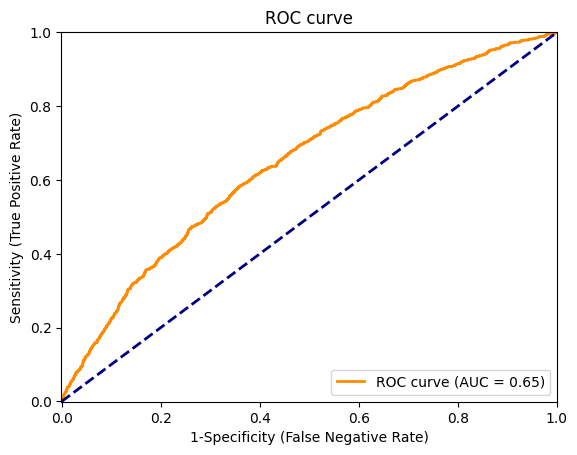

 AUC: 0.6502354779024443


In [ ]:
# Lets look at the model metrics
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


In [ ]:
# Apply variable selection with Stepwise Recursive Feature Selection

from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=30, step=1) # in this example we will select 30 variables; this number "30" is a hyperparameter to tune
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

# which 30 variables are in the model?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(30)


,0,1
23,Utilization_4,1
22,Utilization_3,1
46,MARRIAGE_2,1
24,Utilization_5,1
25,Utilization_6,1
26,Bill_payoff_1,1
27,Bill_payoff_5,1
28,Bill_payoff_2,1
39,EDUCATION_1,1
30,Bill_payoff_4,1


Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[2761  431]
 [ 978  630]]
                                   Accuracy: 0.7064583333333333
                   SENSITIVITY (aka RECALL): 0.5937794533459001
                 SPECIFICITY (aka FALL-OUT): 0.7384327360256753
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.3917910447761194
                 NEGATIVE PREDICTIVE VALUE): 0.8649749373433584


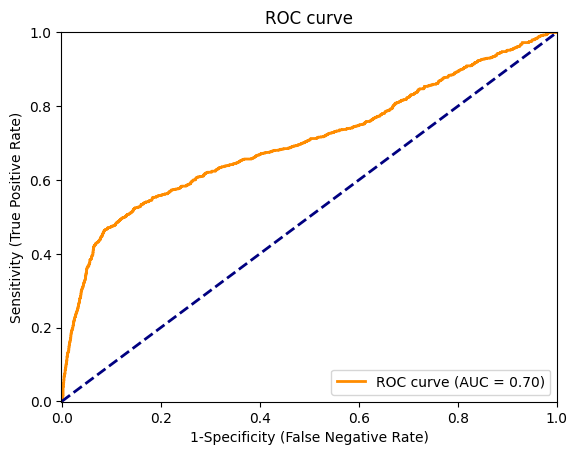

 AUC: 0.7033032364618905


In [ ]:
# Train the model and call it classifier_LR_RFE
classifier_LR_RFE = rfe.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


# Lets look at the model metrics after variable selection
print('Metrics of the logistic regression model after variable selection: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## Summary for Logistic Regression:

- We first trained the model with the entire set of all variables
- When applied to testing data, AUC=64%
- Through variable selection AUC increased to 70%

# Method №2: Classification and Regression Tree, CART (aka "decision tree")


In [ ]:
# Define a CART model and call it classifier_DT
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 7, random_state=77300) # random_state -- is same as random seed, neede to get the same result every time we rerun

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)

#  Use the trained model to predict testing data
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred[0:5]) # resultant predicted classification
print(y_test[0:5]) # actual outcomes


[0.18314484 0.69867886 0.09055118 0.1626409  0.41164241]
[0 1 0 0 1]
14634    0
7633     1
5598     0
6502     0
20174    0
Name: DEFAULT, dtype: int64


CART tree with 7 leafs


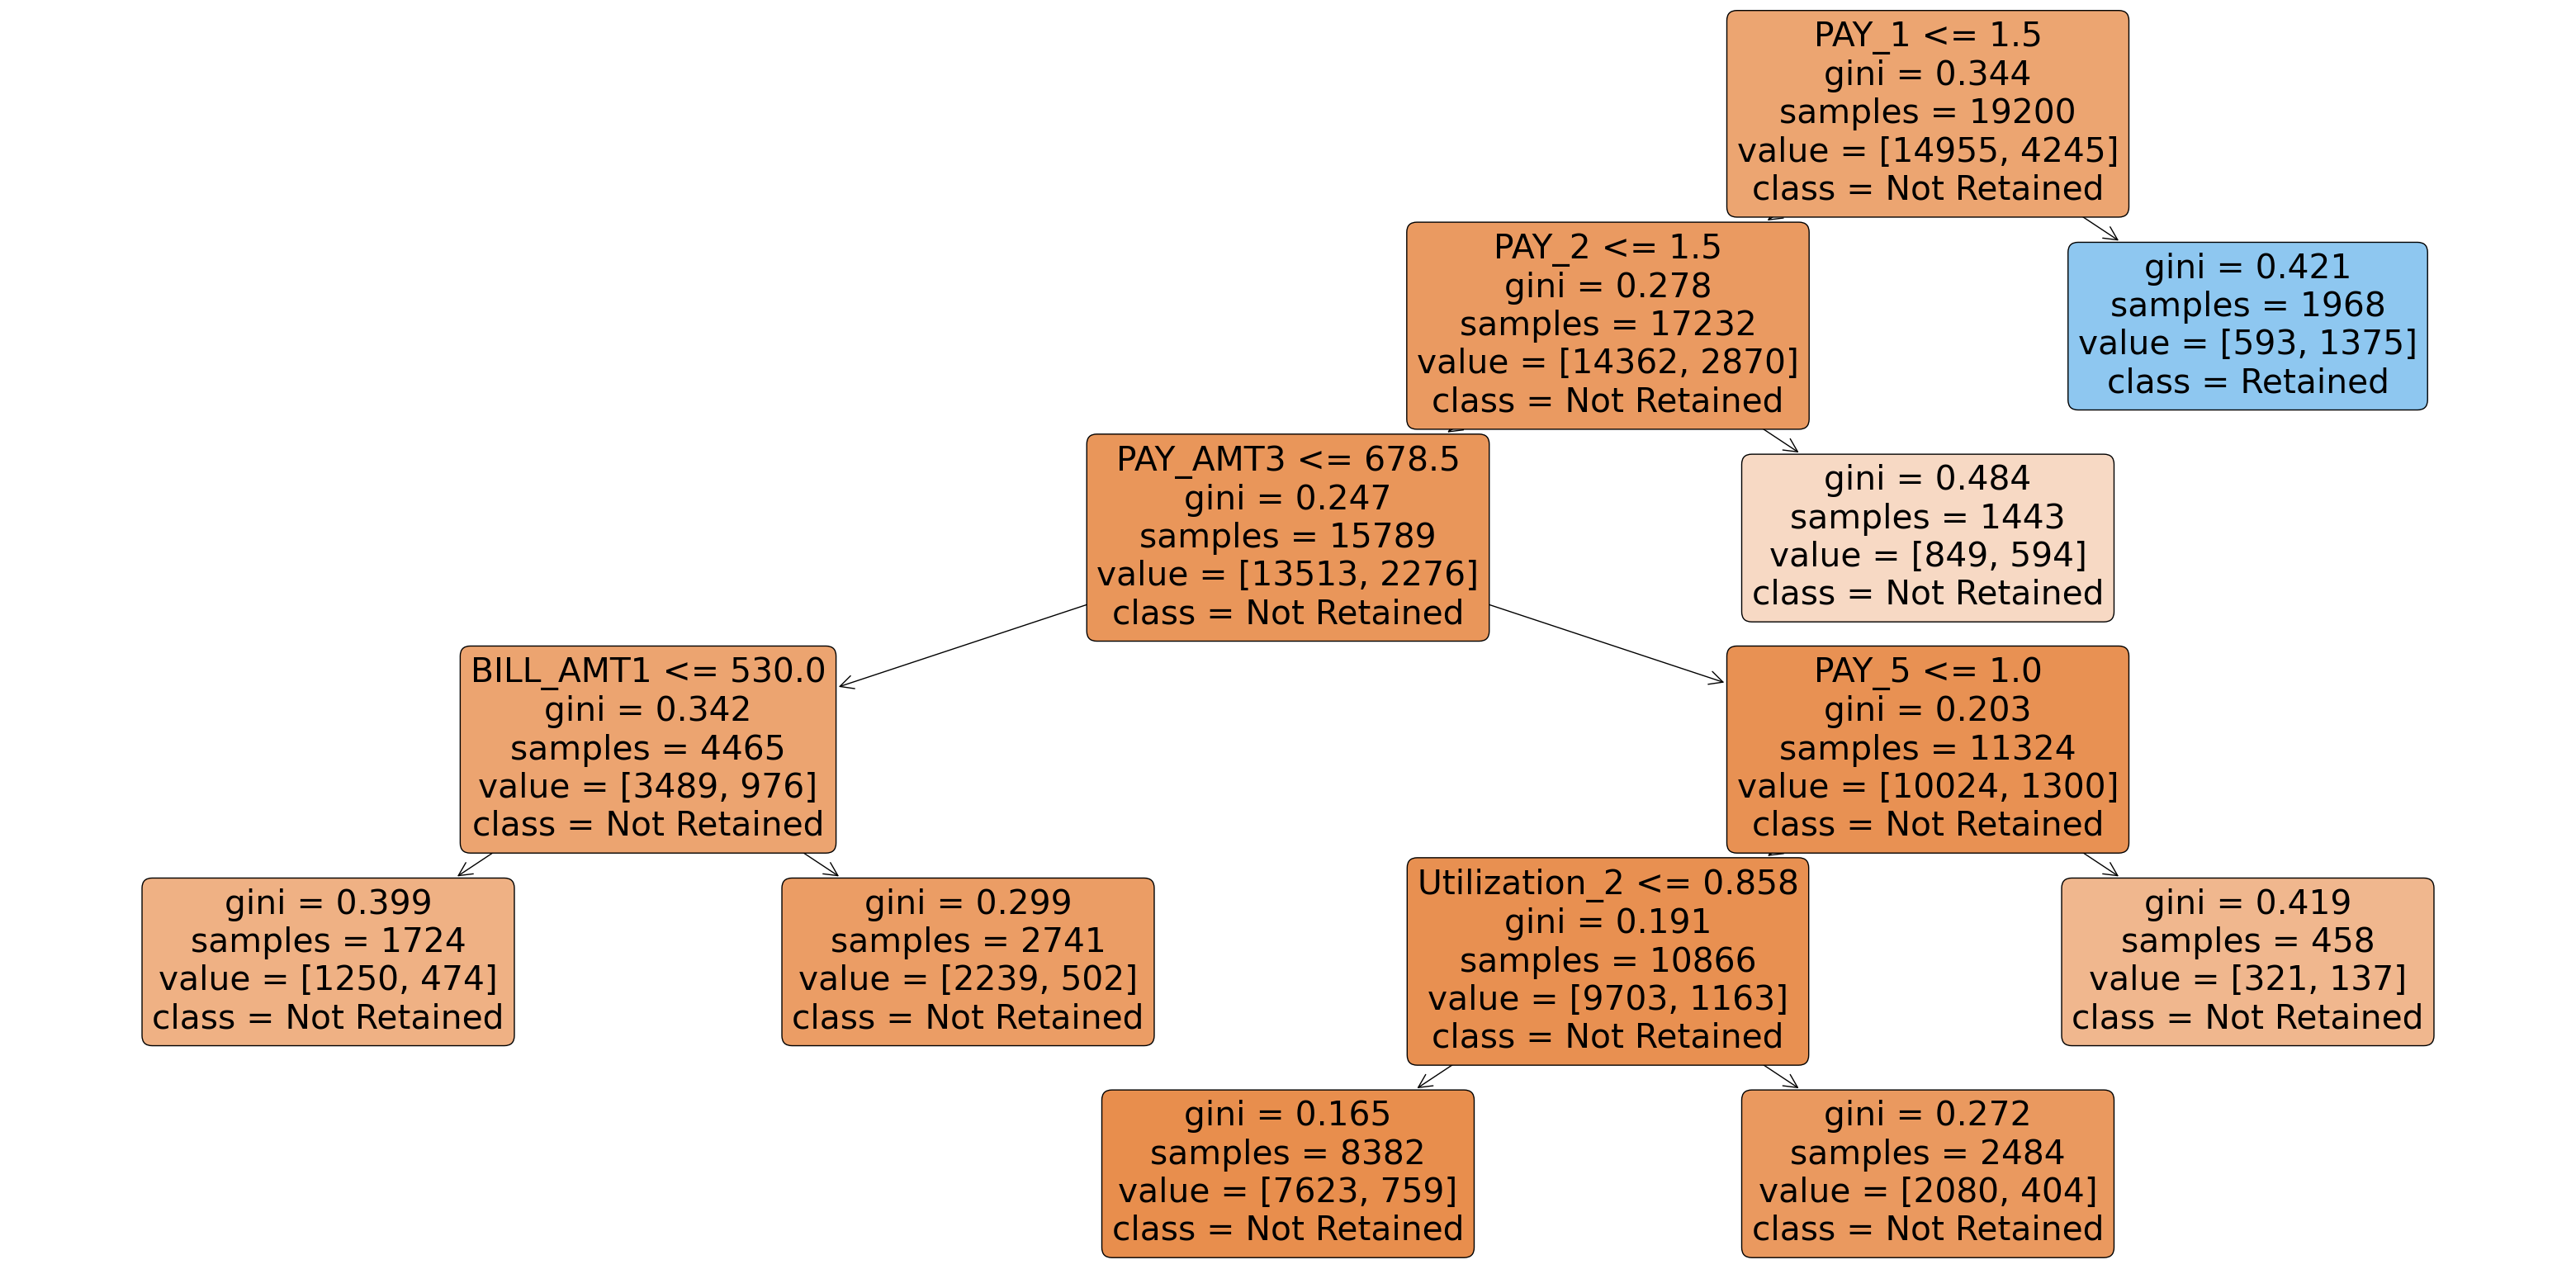

In [ ]:
# Visualizing the resultant tree

from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True,
               class_names = ['Not Retained', 'Retained'], rounded = True)
print('CART tree with 7 leafs')


Metrics of the CART model: 

Confusion matrix: 
[[3000  408]
 [ 739  653]]
                                   Accuracy: 0.7610416666666666
                   SENSITIVITY (aka RECALL): 0.6154571159283695
                 SPECIFICITY (aka FALL-OUT): 0.8023535704733886
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.46910919540229884
                 NEGATIVE PREDICTIVE VALUE): 0.8802816901408451


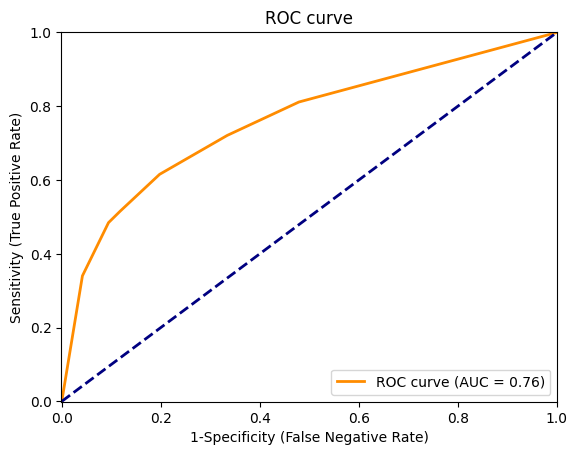

 AUC: 0.7597503099887852


In [ ]:
# Lets look at the model metrics

print('Metrics of the CART model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Hyper-parameter tuning. A CART model has multiple hyper-parameters, for instance:
# -- max number of leaves on a tree,
# -- min number of datapoints at a leaf
# -- min number of datapoints to create a split
# and so on

DecisionTreeClassifier() # display what those hyper-parameters are and their default values

DecisionTreeClassifier()

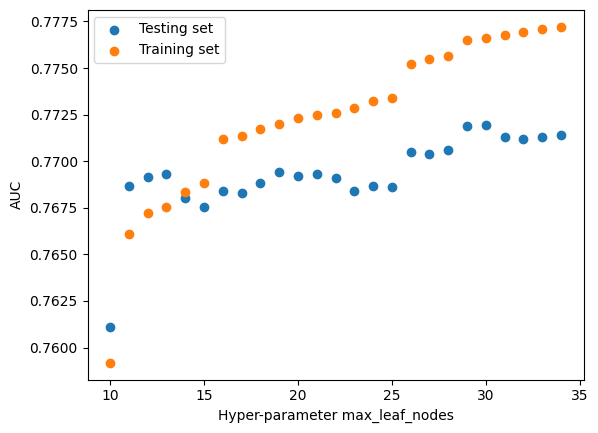

In [ ]:
# Tuning hyper-parameter max_leaf_nodes

n_max_leaf_nodes = range(10,35) # Lets train the models with 10, ... 35 leafs

# for each model calculate AUC for testing
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_test, y_pred_prob)])

# plot the testing set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# now for each model calculate AUC on training
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_train)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_train, y_pred_prob)])

# plot the training set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# label the axes on the plot
plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC')

# add the legend
plt.legend(['Testing set','Training set'])


## This plot illustrates the concept of "overfitting":  

- the more leafs the tree has, the higher is the AUC on the training data

- however, starting from ~31 leafs, the testing set AUC starts to drop, since a model that is too complex "learns" something that does not generalize to the new data

In [ ]:
# lets train the model with 8 leafs
classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 29)
classifier_DT = classifier_DT.fit(X_train, y_train)

# obtain its predictions
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

# calclate and print the AUC
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

 AUC: 0.771913667461626


## Summary for CART:

- we first trained the model with default hyper-parameters
- applying it to testing set we got AUC=76%
- we then tuned the hyper-paramter max_leaf_nodes and increased AUC to 77%

# Method №3: Random Forest

In [ ]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=77300) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)

# A random forest model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble,
# -- voting rules,
# -- max number of leafs on each tree,
# -- min number of datapoints at a leaf
# and so on

RandomForestClassifier(random_state=77300)

Metrics of the Random Forest model: 

Confusion matrix: 
[[2699  331]
 [1040  730]]
                                   Accuracy: 0.714375
                   SENSITIVITY (aka RECALL): 0.6880301602262017
                 SPECIFICITY (aka FALL-OUT): 0.721850762235892
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4124293785310734
                 NEGATIVE PREDICTIVE VALUE): 0.8907590759075907


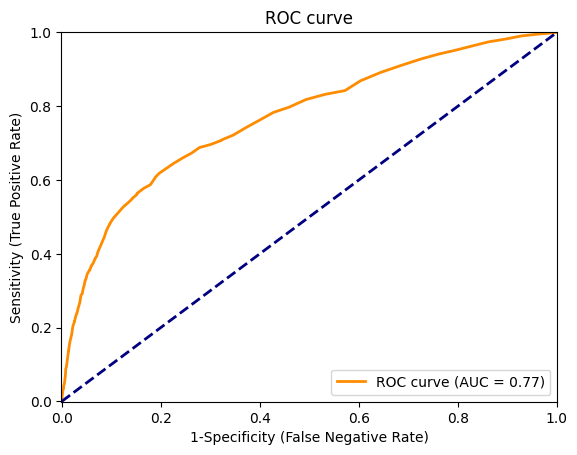

 AUC: 0.7677354043113334


In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


Optimized hyper-parameters:{'n_estimators': 420}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[2684  321]
 [1055  740]]
                                   Accuracy: 0.7133333333333334
                   SENSITIVITY (aka RECALL): 0.6974552309142319
                 SPECIFICITY (aka FALL-OUT): 0.717838994383525
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.41225626740947074
                 NEGATIVE PREDICTIVE VALUE): 0.8931780366056572


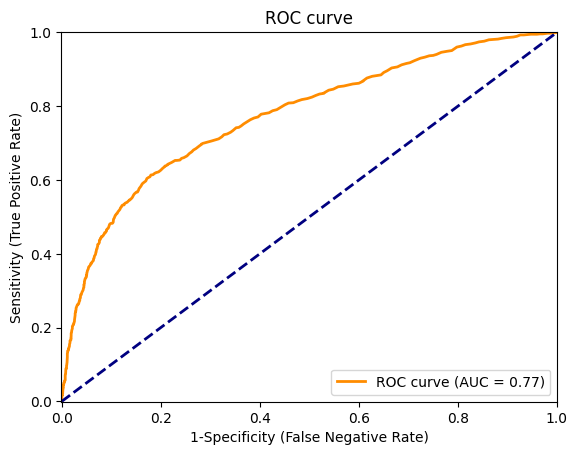

 AUC: 0.7730098140218533


In [ ]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [400, 420, 450, 470, 500] # as an example, we will tune the "numeber of trees" hyper-parameter (n_trees)
Grid_srch_parameters_list = [ [{'n_estimators':n_trees}] ]

# we will apply a 4-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF,
                           cv = 4,
                           param_grid = Grid_srch_parameters_list[0],
                           scoring = score_func,
                           return_train_score = True)

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


<Axes: title={'center': 'Feature Importance'}>

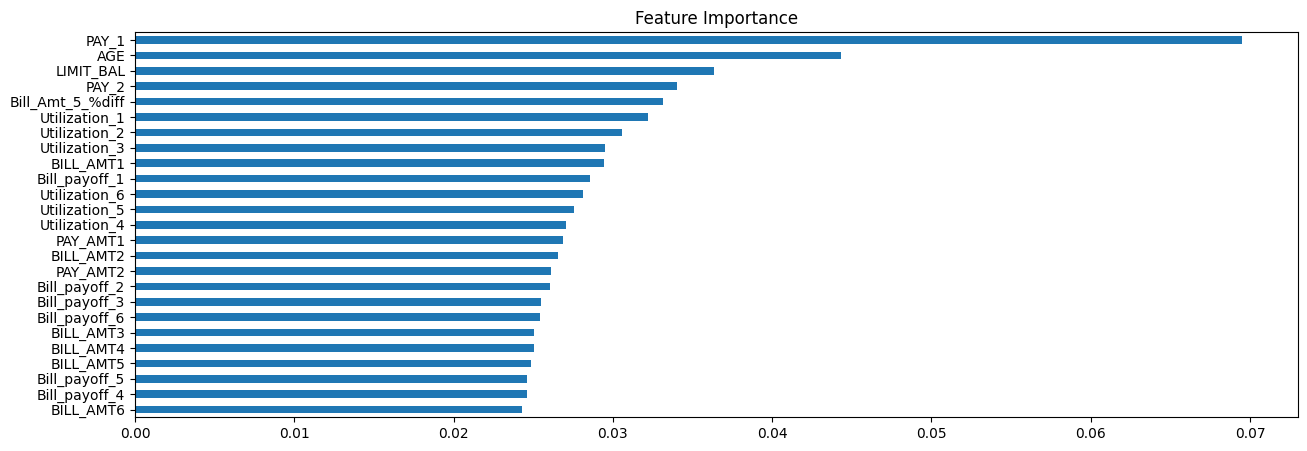

In [ ]:
# Tree models do not have coefficients, but have easily-interpretable tree plots
# But in tree ensembles (such as random forect) there is no point to look at individual trees

# Useful intuition, however, can be obtained from the Feature Importance Plots

# calculate feature importances
importances = grid_search_RF.best_estimator_.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(25).sort_values().plot(kind='barh', align='center')

## Summary for Random Forest:

- we first trained the model with default hyper-parameters
- applying it to testing set we got AUC=77%
- we then tuned the hyper-paramter "number of trees" and increased AUC to 77%

# Method №4: Gradient Boosting Machine

In [ ]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

# A gradient boosting model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble,
# -- speed of boosting ("learning rate", "decay rate"),
# -- max number of leafs on each tree,
# -- min number of datapoints at a leaf
# and so on


GradientBoostingClassifier(random_state=77300)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[2858  398]
 [ 726  619]]
                                   Accuracy: 0.755705281460552
                   SENSITIVITY (aka RECALL): 0.6086529006882989
                 SPECIFICITY (aka FALL-OUT): 0.7974330357142857
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.46022304832713756
                 NEGATIVE PREDICTIVE VALUE): 0.8777641277641277


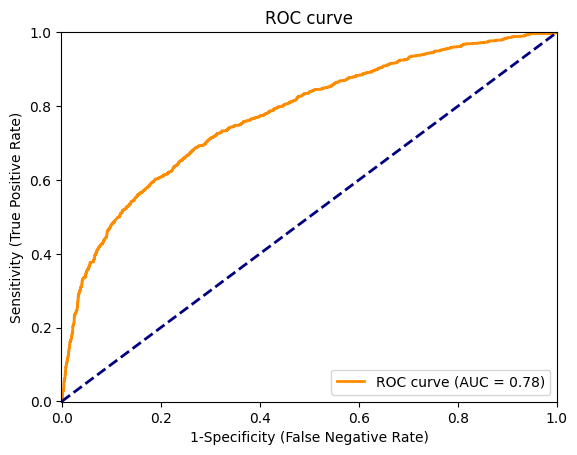

 AUC: 0.7752891140785223


In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
df_f = df_f.drop(columns = ['PAY_1','ID','BILL_AMT1','PAY_AMT1'])

In [ ]:
X_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
20160,150000.0,2,1,2,25,-1,-1,2,2,-2,0.0,594.0,594.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0
13671,110000.0,2,2,2,28,0,0,0,0,0,105080.0,107420.0,107325.0,108545.0,105341.0,5540.0,5361.0,4500.0,4000.0,4500.0
15349,200000.0,2,1,2,31,-2,-2,-2,-2,-2,2180.0,2750.0,0.0,1060.0,2000.0,2750.0,0.0,1060.0,2000.0,1060.0
849,140000.0,2,3,2,24,2,2,2,0,0,45739.0,46468.0,45422.0,46371.0,47297.0,1775.0,0.0,1833.0,1850.0,2000.0
17657,230000.0,2,1,2,29,0,0,0,0,0,5605.0,7719.0,7601.0,12140.0,16145.0,3050.0,5000.0,5000.0,5000.0,5000.0


In [ ]:
X_1['Pay_1_to_2'] = X_1['PAY_1']-X_1['PAY_2']
X_1['Pay_2_to_3'] = X_1['PAY_2']-X_1['PAY_3']
X_1['Pay_3_to_4'] = X_1['PAY_3']-X_1['PAY_4']
X_1['Pay_4_to_5'] = X_1['PAY_4']-X_1['PAY_5']
#df['Pay_5_to_6'] = df['PAY_5']-df['PAY_6']

In [ ]:
X_1['Bill_payoff_1'] = np.where(X_1['BILL_AMT1'] > 0, X_1['PAY_AMT1']/X_1['BILL_AMT1'], np.where(X_1['BILL_AMT1'] < 0, 1+abs(X_1['PAY_AMT1']/X_1['BILL_AMT1']),np.where(X_1['BILL_AMT1'] < X_1['PAY_AMT1'], 1.5, 1)))
X_1['Bill_payoff_2'] = np.where(X_1['BILL_AMT2'] > 0, X_1['PAY_AMT2']/X_1['BILL_AMT2'], np.where(X_1['BILL_AMT2'] < 0, 1+abs(X_1['PAY_AMT2']/X_1['BILL_AMT2']),np.where(X_1['BILL_AMT2'] < X_1['PAY_AMT2'], 1.5, 1)))
X_1['Bill_payoff_3'] = np.where(X_1['BILL_AMT3'] > 0, X_1['PAY_AMT3']/X_1['BILL_AMT3'], np.where(X_1['BILL_AMT3'] < 0, 1+abs(X_1['PAY_AMT3']/X_1['BILL_AMT3']),np.where(X_1['BILL_AMT3'] < X_1['PAY_AMT3'], 1.5, 1)))
X_1['Bill_payoff_4'] = np.where(X_1['BILL_AMT4'] > 0, X_1['PAY_AMT4']/X_1['BILL_AMT4'], np.where(X_1['BILL_AMT4'] < 0, 1+abs(X_1['PAY_AMT4']/X_1['BILL_AMT4']),np.where(X_1['BILL_AMT4'] < X_1['PAY_AMT4'], 1.5, 1)))
X_1['Bill_payoff_5'] = np.where(X_1['BILL_AMT5'] > 0, X_1['PAY_AMT5']/X_1['BILL_AMT5'], np.where(X_1['BILL_AMT5'] < 0, 1+abs(X_1['PAY_AMT5']/X_1['BILL_AMT5']),np.where(X_1['BILL_AMT5'] < X_1['PAY_AMT5'], 1.5, 1)))
#df['Bill_payoff_6'] = np.where(df['BILL_AMT6'] > 0, df['PAY_AMT6']/df['BILL_AMT6'], np.where(df['BILL_AMT6'] < 0, 1+abs(df['PAY_AMT6']/df['BILL_AMT6']),np.where(df['BILL_AMT6'] < df['PAY_AMT6'], 1.5, 1)))


In [ ]:
X_1['Utilization_1'] = X_1['BILL_AMT1']/X_1['LIMIT_BAL']
X_1['Utilization_2'] = X_1['BILL_AMT2']/X_1['LIMIT_BAL']
X_1['Utilization_3'] = X_1['BILL_AMT3']/X_1['LIMIT_BAL']
X_1['Utilization_4'] = X_1['BILL_AMT4']/X_1['LIMIT_BAL']
X_1['Utilization_5'] = X_1['BILL_AMT5']/X_1['LIMIT_BAL']
#df['Utilization_6'] = df['BILL_AMT6']/df['LIMIT_BAL']


In [ ]:
X_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,Pay_1_to_2,Pay_2_to_3,Pay_3_to_4,Pay_4_to_5,Bill_payoff_1,Bill_payoff_2,Bill_payoff_3,Bill_payoff_4,Bill_payoff_5,Utilization_1,Utilization_2,Utilization_3,Utilization_4,Utilization_5
20160,150000.0,2,1,2,25,-1,-1,2,2,-2,0.0,594.0,594.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0,0,-3,0,4,1.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.003960,0.003960,0.000000,0.000000
13671,110000.0,2,2,2,28,0,0,0,0,0,105080.0,107420.0,107325.0,108545.0,105341.0,5540.0,5361.0,4500.0,4000.0,4500.0,0,0,0,0,0.052722,0.049907,0.041929,0.036851,0.042718,0.955273,0.976545,0.975682,0.986773,0.957645
15349,200000.0,2,1,2,31,-2,-2,-2,-2,-2,2180.0,2750.0,0.0,1060.0,2000.0,2750.0,0.0,1060.0,2000.0,1060.0,0,0,0,0,1.261468,0.000000,1.500000,1.886792,0.530000,0.010900,0.013750,0.000000,0.005300,0.010000
849,140000.0,2,3,2,24,2,2,2,0,0,45739.0,46468.0,45422.0,46371.0,47297.0,1775.0,0.0,1833.0,1850.0,2000.0,0,0,2,0,0.038807,0.000000,0.040355,0.039896,0.042286,0.326707,0.331914,0.324443,0.331221,0.337836
17657,230000.0,2,1,2,29,0,0,0,0,0,5605.0,7719.0,7601.0,12140.0,16145.0,3050.0,5000.0,5000.0,5000.0,5000.0,0,0,0,0,0.544157,0.647752,0.657808,0.411862,0.309693,0.024370,0.033561,0.033048,0.052783,0.070196


In [ ]:
X_1['SEX'] = X_1['SEX'].astype('category')
X_1['EDUCATION'] = X_1['EDUCATION'].astype('category')
X_1['MARRIAGE'] = X_1['MARRIAGE'].astype('category')

In [ ]:
X_1 = pd.get_dummies(X_1, columns = X_1.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)
X_1.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,Pay_1_to_2,Pay_2_to_3,Pay_3_to_4,Pay_4_to_5,Bill_payoff_1,Bill_payoff_2,Bill_payoff_3,Bill_payoff_4,Bill_payoff_5,Utilization_1,Utilization_2,Utilization_3,Utilization_4,Utilization_5,SEX_2_1_1,EDUCATION_2_1_1,EDUCATION_3_1_1,EDUCATION_4_1_1,EDUCATION_5_1_1,EDUCATION_6_1_1,MARRIAGE_2_1_1,MARRIAGE_3_1_1
20160,150000.0,25,-1,-1,2,2,-2,0.0,594.0,594.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0,0,-3,0,4,1.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.003960,0.003960,0.000000,0.000000,1,0,0,0,0,0,1,0
13671,110000.0,28,0,0,0,0,0,105080.0,107420.0,107325.0,108545.0,105341.0,5540.0,5361.0,4500.0,4000.0,4500.0,0,0,0,0,0.052722,0.049907,0.041929,0.036851,0.042718,0.955273,0.976545,0.975682,0.986773,0.957645,1,1,0,0,0,0,1,0
15349,200000.0,31,-2,-2,-2,-2,-2,2180.0,2750.0,0.0,1060.0,2000.0,2750.0,0.0,1060.0,2000.0,1060.0,0,0,0,0,1.261468,0.000000,1.500000,1.886792,0.530000,0.010900,0.013750,0.000000,0.005300,0.010000,1,0,0,0,0,0,1,0
849,140000.0,24,2,2,2,0,0,45739.0,46468.0,45422.0,46371.0,47297.0,1775.0,0.0,1833.0,1850.0,2000.0,0,0,2,0,0.038807,0.000000,0.040355,0.039896,0.042286,0.326707,0.331914,0.324443,0.331221,0.337836,1,0,1,0,0,0,1,0
17657,230000.0,29,0,0,0,0,0,5605.0,7719.0,7601.0,12140.0,16145.0,3050.0,5000.0,5000.0,5000.0,5000.0,0,0,0,0,0.544157,0.647752,0.657808,0.411862,0.309693,0.024370,0.033561,0.033048,0.052783,0.070196,1,0,0,0,0,0,1,0


In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_1)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_1, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_1, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_1, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_1, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_1, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_1, y_pred)))

plot_roc(y_1, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_1, y_pred_prob)))

ValueError: ignored

Optimized hyper-parameters:{'learning_rate': 0.1, 'n_estimators': 160}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[2990  378]
 [ 749  683]]
                                   Accuracy: 0.7652083333333334
                   SENSITIVITY (aka RECALL): 0.6437323279924599
                 SPECIFICITY (aka FALL-OUT): 0.7996790585718107
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.47695530726256985
                 NEGATIVE PREDICTIVE VALUE): 0.8877672209026128


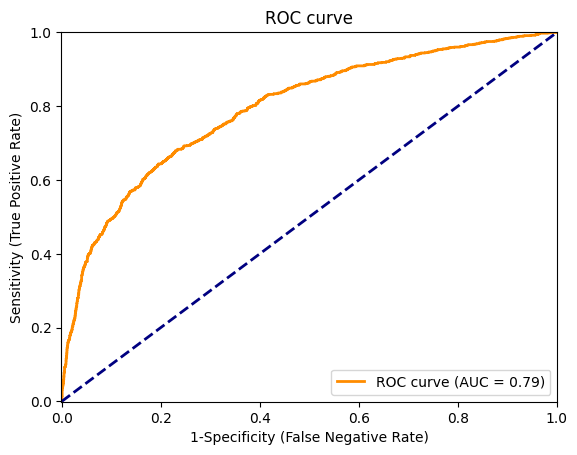

 AUC: 0.793431766798695


In [ ]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [140, 160, 200] # first, the "numeber of trees" hyper-parameter (n_trees)
learning_rates = [0.05, 0.1] # second, speed of boosting ("learning rate") and we will consider two values

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates}] ]

# we will apply a 4-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 4, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True)

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## Summary for Gradient Boosting:

- we first trained the model with default hyper-parameters
- applying it to testing set we got AUC=79%
- we then tuned two hyper-paramters "number of trees" and "learning rate" and increased AUC to 79%

# Method №5: Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)

# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svm', SVC(probability=True))])

Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[3470  609]
 [ 269  452]]
                                   Accuracy: 0.8170833333333334
                   SENSITIVITY (aka RECALL): 0.42601319509896324
                 SPECIFICITY (aka FALL-OUT): 0.9280556298475529
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.6269070735090153
                 NEGATIVE PREDICTIVE VALUE): 0.850698700661927


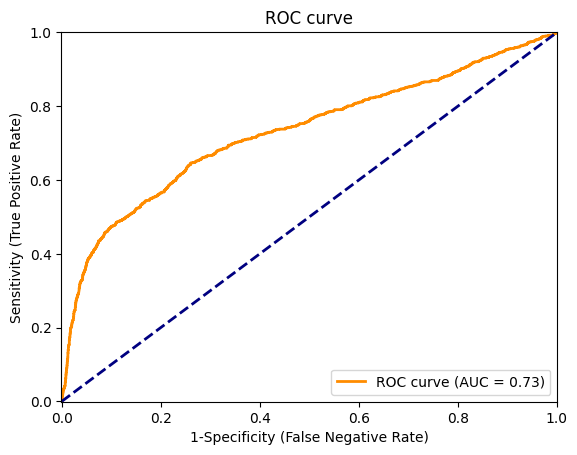

 AUC: 0.7295531548527266


In [ ]:
# use the fitted model to predict the testing data
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Summary for SVM:

- we trained the model with default hyper-parameters
- applying it to testing set we got AUC=73%


# Method №6: Artificial Neural Networks ("Deep Learning") with Tensor Flow

In [ ]:
# conda install tensorflow keras

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor


In [ ]:
# Define the architecture and optimization metrics for the network
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu",input_dim=48, name="hidden-dense-128-layer-1"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="tanh", name="hidden-dense-128-layer-1a"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu", name="hidden-dense-64-layer-2"),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid', name="output-layer"),
    ])
    adam = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

nn_estimators = []
nn_estimators.append(('standardize', StandardScaler())) #scale the data
nn_estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=30, batch_size=128, validation_split=0.2))) # compile the model

# Define the TensorFlow Neural Network model and call it classifier_TF_NN
Classifier_TF_NN = Pipeline(nn_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_TF_NN.fit(X_train, y_train)

Epoch 1/30
115/115 [==============================] - 4s 12ms/step - loss: 0.4729 - accuracy: 0.8064 - val_loss: 0.4566 - val_accuracy: 0.8128
Epoch 2/30
115/115 [==============================] - 1s 8ms/step - loss: 0.4490 - accuracy: 0.8205 - val_loss: 0.4483 - val_accuracy: 0.8130
Epoch 3/30
115/115 [==============================] - 1s 8ms/step - loss: 0.4448 - accuracy: 0.8210 - val_loss: 0.4569 - val_accuracy: 0.8109
Epoch 4/30
115/115 [==============================] - 1s 9ms/step - loss: 0.4441 - accuracy: 0.8186 - val_loss: 0.4647 - val_accuracy: 0.8114
Epoch 5/30
115/115 [==============================] - 1s 9ms/step - loss: 0.4410 - accuracy: 0.8201 - val_loss: 0.4518 - val_accuracy: 0.8087
Epoch 6/30
115/115 [==============================] - 1s 8ms/step - loss: 0.4363 - accuracy: 0.8209 - val_loss: 0.4609 - val_accuracy: 0.8082
Epoch 7/30
115/115 [==============================] - 2s 15ms/step - loss: 0.4386 - accuracy: 0.8197 - val_loss: 0.4571 - val_accuracy: 0.8130
Epoc

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 KerasClassifier(batch_size=128, build_fn=<function create_model at 0x7aca823a7520>, epochs=30, validation_split=0.2))])

38/38 [==============================] - 1s 5ms/step
Metrics of the Tensor Flow Neural Network model: 

Confusion matrix: 
[[2768  356]
 [ 971  705]]
                                   Accuracy: 0.7235416666666666
                   SENSITIVITY (aka RECALL): 0.6644674835061263
                 SPECIFICITY (aka FALL-OUT): 0.7403048943567799
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.42064439140811455
                 NEGATIVE PREDICTIVE VALUE): 0.8860435339308579


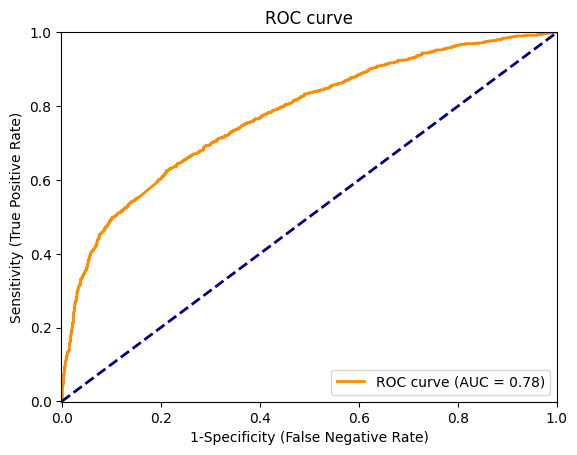

 AUC: 0.7754113290912533


In [ ]:
# use the fitted model to predict the testing data
y_pred_prob = Classifier_TF_NN.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Tensor Flow Neural Network model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Summary for Tensor Flow NN:

- we trained the model with default hyper-parameters and some "semi-randomly"-selected architecture
- applying it to testing set we got AUC=77.5 not bad at all


# Step 10: Finishing the anlayses -- export the model predictions for subsequent use

In [ ]:
# we have the prediction data -  load and clean it first to obtain the X_pred matrix of exactly the same structure as X_train
#X_pred = ETL file pioner with 1000 records

# Which model should we take?

# GBM has highest AUC
y_pred_prob = grid_search_GBM.predict_proba(X_pred)[:,1]

# Lets add the ID column to know "who is who"
Prediction = pd.DataFrame(data={"ID":X_pred["ID"],"Predicted Probability":y_pred_prob})

# Export the predictions into a CSV file
Prediction.to_csv("Predicted defaults.csv",sep = ',')

# BONUS: Gains ("Lift") chart

In [ ]:
#pip install scikit-plot
!pip install scikit-plot

import scikitplot as skplt

38/38 [==============================] - 0s 2ms/step


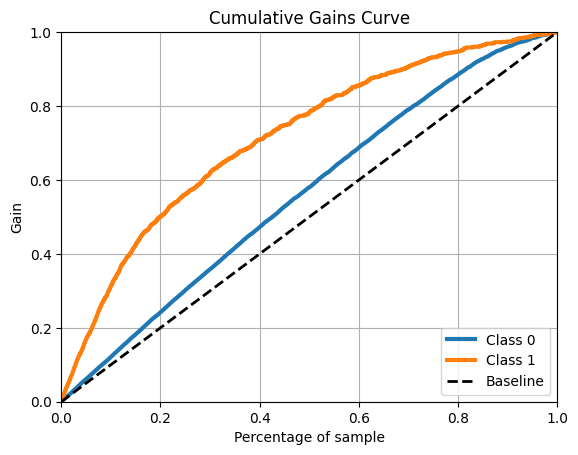

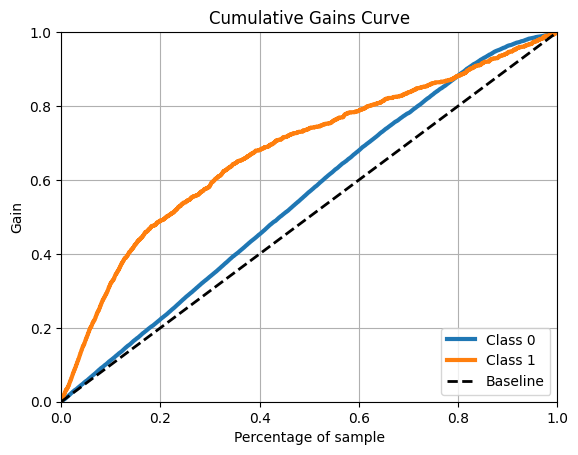

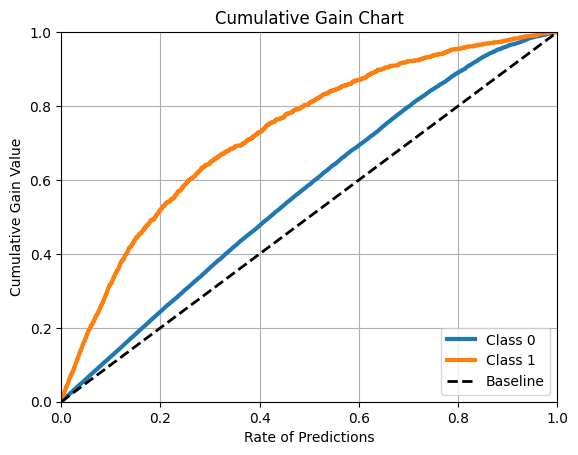

In [ ]:
# as an example, here is the gains chart with SVM; note, people often call this "lift chart"
# note, this is a "sister-plot" to the lift chart we saw in class -- take the ratio of the Class 1 and Baseline values to obtain what we saw

y_pred_proba1=Classifier_TF_NN.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(np.int32(y_test), y_pred_proba1)

y_pred_proba=Classifier_SVM.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(np.int32(y_test), y_pred_proba)

y_pred_proba2=grid_search_GBM.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(np.int32(y_test), y_pred_proba2)



plt.ylabel("Cumulative Gain Value")
plt.xlabel("Rate of Predictions")
plt.title("Cumulative Gain Chart")
plt.show()